In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from glob import glob

%config InlineBackend.figure_format = 'retina'

In [2]:
file_name = glob("data/misemise_processed.csv")
file_name

df = pd.read_csv(file_name[0], encoding='cp949')
df.head(4)

,지역,측정일시,연도,월,일,PM10,PM25
0,강원 강릉시,20150101,2015,1,1,60.375000,8.625000
1,강원 강릉시,20150102,2015,1,2,30.416667,7.416667
2,강원 강릉시,20150103,2015,1,3,27.333333,6.958333
3,강원 강릉시,20150104,2015,1,4,49.869565,21.782609


/var/folders/vl/mmn9ctlx4m58c_kvrkgwprlm0000gn/T/ipykernel_19705/1432553262.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['연도'])['PM10','PM25'].mean().plot(kind="line")


<AxesSubplot:xlabel='연도'>

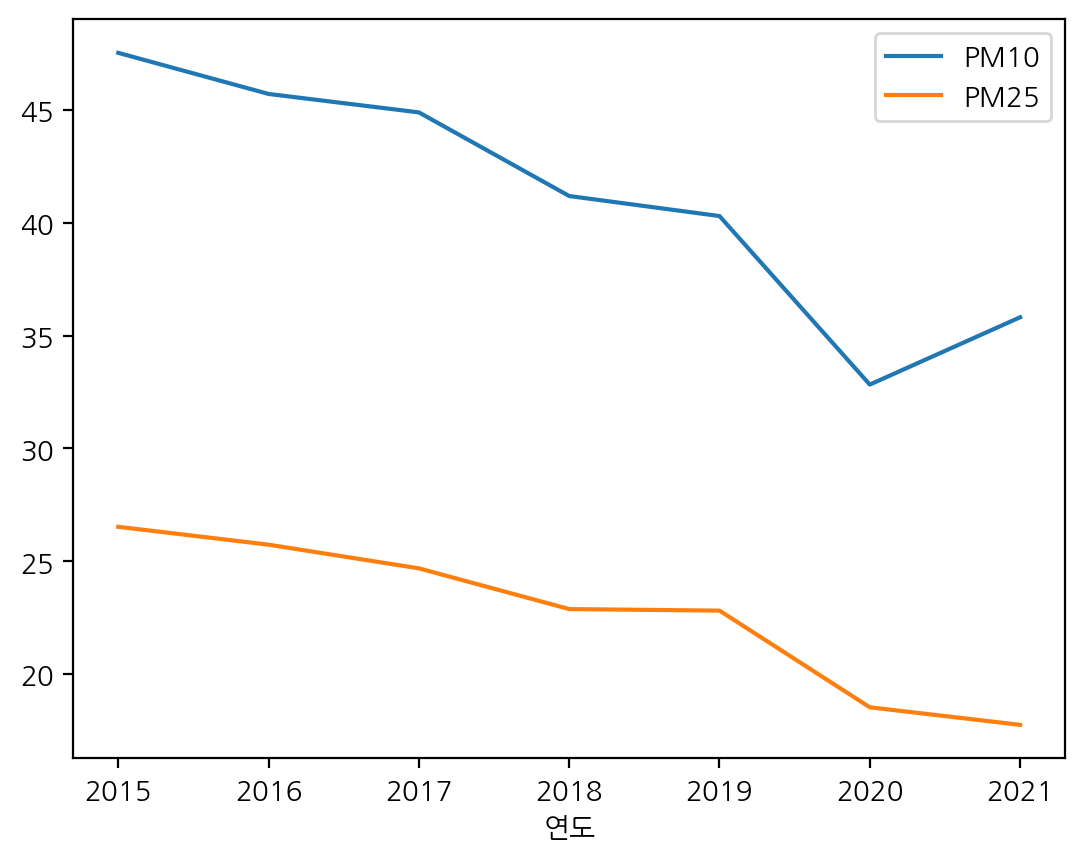

In [3]:
df.groupby(['연도'])['PM10','PM25'].mean().plot(kind="line")

In [6]:
df_top20 = df.groupby(['지역'])['PM10','PM25'].mean().sort_values(['PM10','PM25'], ascending=False).head(20)
df_top20

/var/folders/vl/mmn9ctlx4m58c_kvrkgwprlm0000gn/T/ipykernel_19705/1336627544.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_top20 = df.groupby(['지역'])['PM10','PM25'].mean().sort_values(['PM10','PM25'], ascending=False).head(20)


,PM10,PM25
지역,,
경기 김포시,51.929362,26.091132
경기 평택시,50.895416,27.362178
경기 부천시,50.600814,27.132594
충남 당진군,50.335693,26.200673
충남 당진시,49.213313,26.640605
충남 아산시,48.566031,26.937043
경기 구리시,48.168476,25.676646
전북 익산시,47.750017,29.660117
경기 시흥시,47.452192,26.522876


<AxesSubplot:xlabel='지역'>

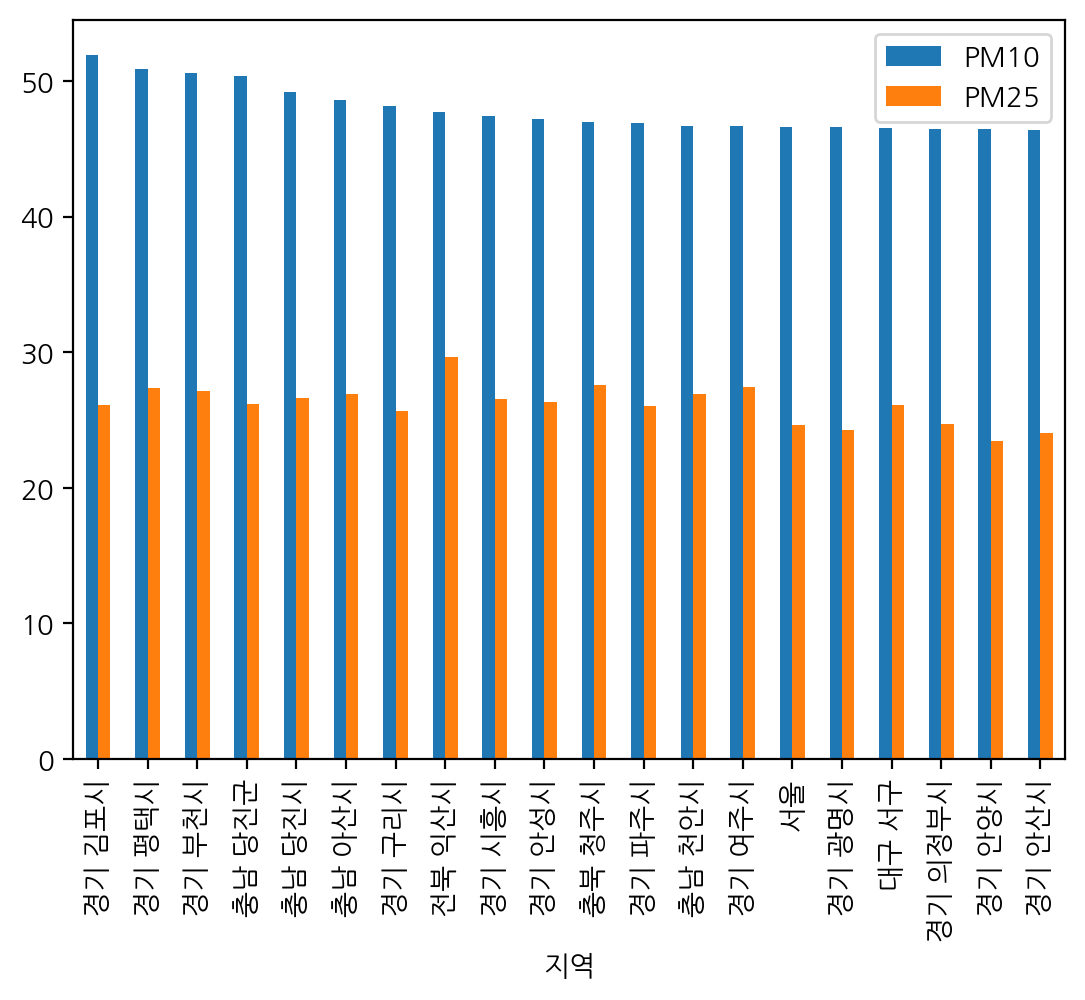

In [7]:
df_top20.plot(kind="bar")

<AxesSubplot:xlabel='월', ylabel='PM10'>

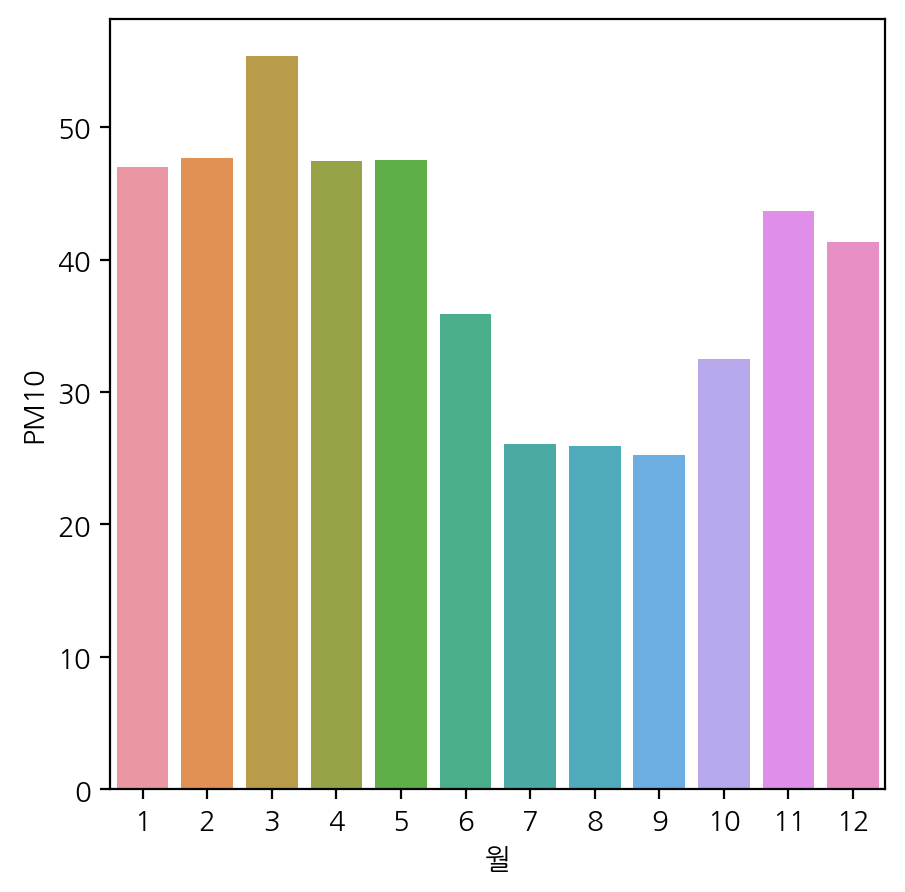

In [8]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x="월", y="PM10", errorbar=None)

<AxesSubplot:xlabel='월'>

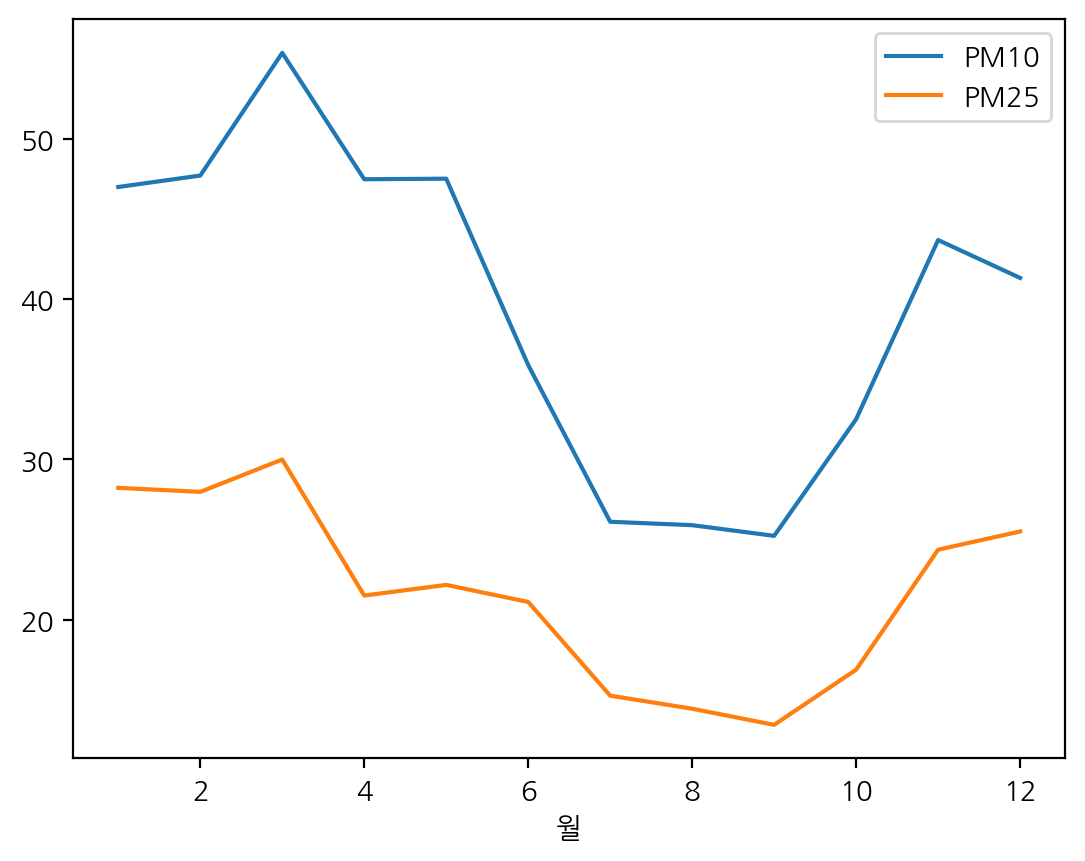

In [9]:
pd.pivot_table(df, index = ['월'], values=["PM10", "PM25"], aggfunc = 'mean').plot(kind="line")